In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 9

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
bac_df = pd.read_csv('../data/order_book/BAC_24_04.csv', index_col=[0], parse_dates=True)
bac_df

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:58:43.114,29.74,29.74,29.74,162.0,Buy
2023-04-24 13:58:43.167,29.73,29.74,29.74,503.0,Buy
2023-04-24 13:58:43.167,29.73,29.74,29.74,197.0,Buy
2023-04-24 13:58:43.567,29.73,29.74,29.74,200.0,Buy
2023-04-24 13:58:44.873,29.73,29.74,29.74,2000.0,Buy
...,...,...,...,...,...
2023-04-24 14:02:34.435,29.69,29.70,29.69,530.0,Sell
2023-04-24 14:02:42.038,29.69,29.70,29.70,100.0,Buy
2023-04-24 14:02:42.038,29.69,29.70,29.70,200.0,Buy


In [3]:
bk_df = pd.read_csv('../data/order_book/BK_24_04.csv', index_col=[0], parse_dates=True)
bk_df

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:46:02.843,44.02,44.03,44.03,100.0,Buy
2023-04-24 13:46:02.843,44.02,44.03,44.03,100.0,Buy
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy
2023-04-24 13:46:04.876,44.01,44.02,44.02,100.0,Buy
...,...,...,...,...,...
2023-04-24 14:03:00.814,43.93,43.94,43.93,100.0,Sell
2023-04-24 14:03:01.235,43.93,43.94,43.93,100.0,Sell
2023-04-24 14:03:06.862,43.93,43.94,43.94,100.0,Buy


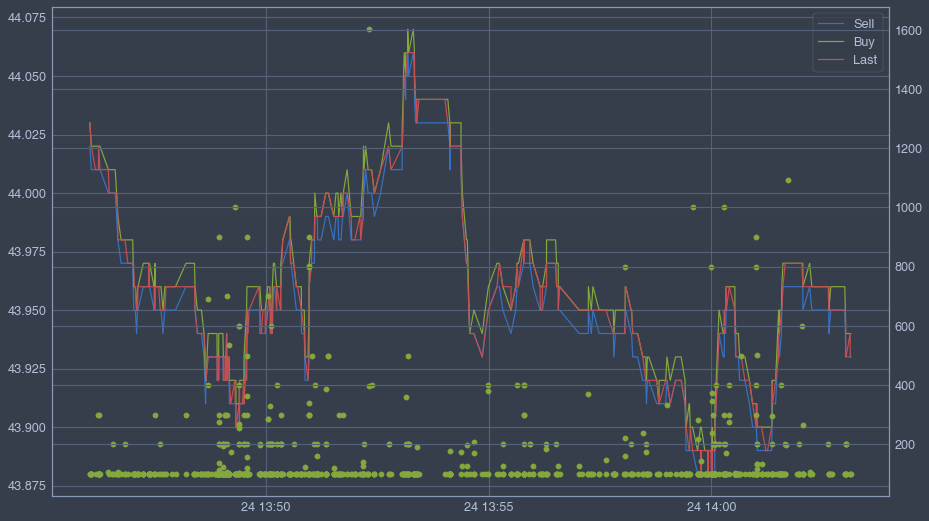

In [114]:
y = np.arange(42, 43, 0.01)

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(bk_df.index, bk_df['Bid'], label='Sell')
ax.plot(bk_df.index, bk_df['Ask'], label='Buy')
ax.plot(bk_df.index, bk_df['Last'], label='Last')
ax2.scatter(bk_df.index, bk_df['Volume'], label='Volume', c='g')
ax.grid(True)
ax.legend()

In [69]:
bk_df['Volume'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Volume,1000.0,140.965,127.969395,100.0,100.0,100.0,100.0,1602.0


In [115]:
bk_df.loc['2023-04-24 13:52:18.427'].iloc[1]

Bid         44.0
Ask        44.01
Last       44.01
Volume    1602.0
Type         Buy
Name: 2023-04-24 13:52:18.427000, dtype: object

In [117]:
bk_df[bk_df['Volume'] == 800]

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:50:58.133,43.94,43.95,43.94,800.0,Sell
2023-04-24 13:58:04.116,43.95,43.96,43.96,800.0,Buy
2023-04-24 14:00:00.032,43.88,43.89,43.88,800.0,Sell
2023-04-24 14:01:00.236,43.90,43.91,43.90,800.0,Sell


In [72]:
bk_df[bk_df['Volume'] == bk_df['Volume'].max()]

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:52:18.427,44.0,44.01,44.01,1602.0,Buy


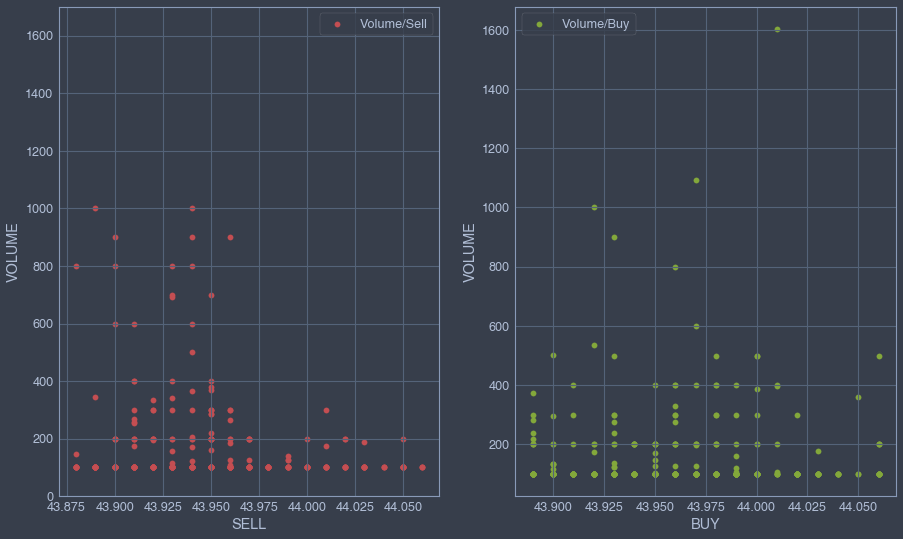

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

ax1.scatter(bk_df[bk_df['Type'] == 'Sell']['Last'], bk_df[bk_df['Type'] == 'Sell']['Volume'], label='Volume/Sell', c='r')
ax1.set_ylim(0, 1700)
ax1.set_xlabel('SELL')
ax1.set_ylabel('VOLUME');
ax1.legend()

ax2.scatter(bk_df[bk_df['Type'] == 'Buy']['Last'], bk_df[bk_df['Type'] == 'Buy']['Volume'], label='Volume/Buy', c='g')
ax1.set_ylim(0, 1700)
ax2.set_xlabel('BUY')
ax2.set_ylabel('VOLUME');
ax2.legend()

(array([ 59.,  45., 102.,  79.,  86.,  61.,  18.,  31.,  14.,  16.]),
 array([43.89 , 43.907, 43.924, 43.941, 43.958, 43.975, 43.992, 44.009,
        44.026, 44.043, 44.06 ]),
 <BarContainer object of 10 artists>)

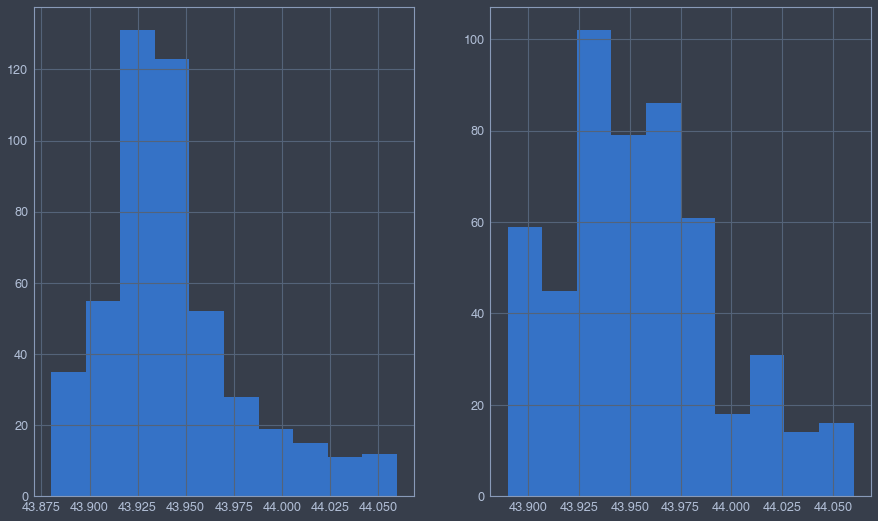

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
sell = bk_df[bk_df['Type'] == 'Sell']['Last']
ax1.hist(sell)

buy = bk_df[bk_df['Type'] == 'Buy']['Last']
ax2.hist(buy)

(array([1., 1., 3., 1., 0., 0., 3., 5., 1., 1.]),
 array([43.88 , 43.888, 43.896, 43.904, 43.912, 43.92 , 43.928, 43.936,
        43.944, 43.952, 43.96 ]),
 <BarContainer object of 10 artists>)

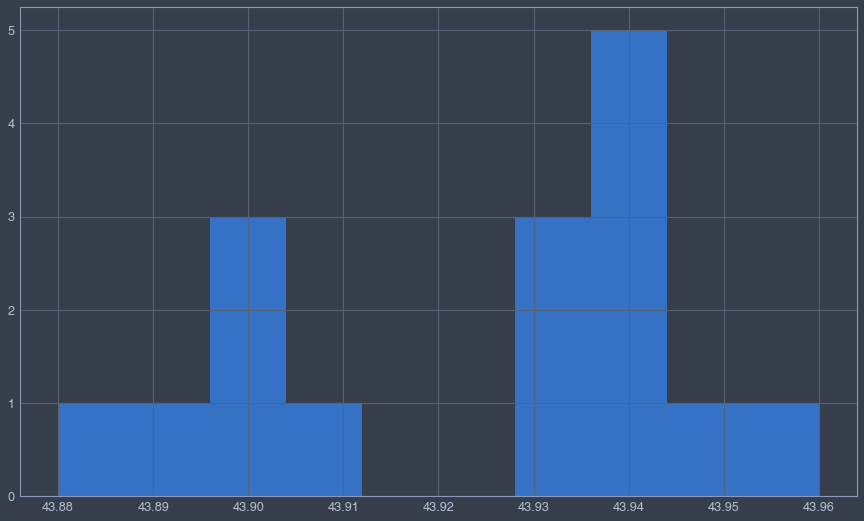

In [61]:
fig, ax = plt.subplots()
sell = bk_df[bk_df['Type'] == 'Sell'][bk_df[bk_df['Type'] == 'Sell']['Volume'] > 400]['Last']
ax.hist(sell)

In [63]:
bk_df[bk_df['Type'] == 'Sell'][bk_df[bk_df['Type'] == 'Sell']['Volume'] > 400]

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:48:42.141,43.93,43.94,43.93,691.0,Sell
2023-04-24 13:49:07.010,43.93,43.94,43.93,700.0,Sell
2023-04-24 13:49:24.389,43.91,43.92,43.90,600.0,Sell
2023-04-24 13:49:24.389,43.91,43.92,43.91,600.0,Sell
2023-04-24 13:49:33.934,43.94,43.95,43.94,900.0,Sell
2023-04-24 13:49:33.934,43.94,43.95,43.94,500.0,Sell
2023-04-24 13:50:02.394,43.95,43.96,43.95,700.0,Sell
2023-04-24 13:50:06.856,43.94,43.95,43.94,600.0,Sell
2023-04-24 13:50:58.133,43.94,43.95,43.93,801.0,Sell


In [64]:
bk_df[bk_df['Type'] == 'Buy'][bk_df[bk_df['Type'] == 'Buy']['Volume'] > 400]

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-04-24 13:48:56.350,43.92,43.93,43.93,900.0,Buy
2023-04-24 13:49:10.777,43.91,43.92,43.92,534.0,Buy
2023-04-24 13:49:18.217,43.91,43.92,43.92,1000.0,Buy
2023-04-24 13:51:01.688,43.97,43.98,43.98,500.0,Buy
2023-04-24 13:51:24.024,43.99,44.00,44.00,500.0,Buy
2023-04-24 13:51:24.024,43.99,44.00,44.00,500.0,Buy
2023-04-24 13:52:18.427,44.00,44.01,44.01,1602.0,Buy
2023-04-24 13:53:10.900,44.05,44.06,44.06,500.0,Buy
2023-04-24 13:58:04.116,43.95,43.96,43.96,800.0,Buy
